In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
patient_data = "/Users/zfeng/Documents/fyp-github/FIT3199-FYP/patient_data/"

In [7]:
memmap_path = "/Users/zfeng/Documents/fyp-github/FIT3199-FYP/ecg_dataset/memmap.npy"
memmap_data = np.memmap(memmap_path, dtype=np.float32, mode='r')

# Load original memmap file
first_100_rows = memmap_data[:1200000]  # Extract the first 100 rows

# Save to .npy format (flush handled internally)
np.save(patient_data+"ecg_data.npy", first_100_rows)


In [27]:
memmap_meta_path = "/Users/zfeng/Documents/fyp-github/FIT3199-FYP/ecg_dataset/memmap_meta.npz"

memmap_meta = np.load(memmap_meta_path, allow_pickle=True)

starts = memmap_meta["start"]
lengths = memmap_meta["length"]
original_shape = tuple(memmap_meta["shape"][0])

In [31]:
memmap_meta["shape"][0]

array([800035000,        12])

In [28]:
original_shape

(np.int64(800035000), np.int64(12))

In [ ]:
loaded_memmap = np.load("/Users/zfeng/Documents/fyp-github/FIT3199-FYP/patient_data/ecg_data.npy", mmap_mode='r')

In [32]:
memmap_data.shape

(9600420000,)

In [42]:
import numpy as np
import pandas as pd

np.random.seed(42)

def generate_vitals_data(n_rows=100):
    data = []
    for _ in range(n_rows):
        stroke = np.random.choice([0, 1], p=[0.7, 0.3])  # 30% stroke patients

        if stroke:
            # Stroke patient vitals: more extreme values likely
            heartrate = np.random.normal(loc=95, scale=10)
            resprate = np.random.normal(loc=22, scale=4)
            o2sat = np.random.normal(loc=90, scale=5)
            sbp = np.random.normal(loc=160, scale=20)
            dbp = np.random.normal(loc=95, scale=10)
        else:
            # Non-stroke patient vitals: within normal range
            heartrate = np.random.normal(loc=75, scale=8)
            resprate = np.random.normal(loc=16, scale=2)
            o2sat = np.random.normal(loc=97, scale=2)
            sbp = np.random.normal(loc=120, scale=10)
            dbp = np.random.normal(loc=75, scale=8)

        data.append([
            round(max(30, min(heartrate, 180)), 1),
            round(max(10, min(resprate, 40)), 1),
            round(max(70, min(o2sat, 100)), 1),
            round(max(80, min(sbp, 250)), 1),
            round(max(40, min(dbp, 130)), 1),
            stroke
        ])

    df = pd.DataFrame(data, columns=["heartrate", "resprate", "o2sat", "sbp", "dbp", "stroke"])
    return df

# Generate and display
df = generate_vitals_data()
print(df.head())

   heartrate  resprate  o2sat    sbp   dbp  stroke
0       66.1      16.6   97.6  130.1  70.4       0
1       70.8      16.5   93.2  102.8  70.5       0
2       71.6      14.5   95.6   98.6  70.0       0
3       79.8      14.9   97.2  108.5  78.0       0
4       70.2      17.9   97.6  113.6  66.8       0


In [43]:
# Add 'length' and 'start' columns
df["length"] = 1000
df["start"] = [i * 1000 for i in range(len(df))]

# Optional: display the updated DataFrame
print(df.head())

   heartrate  resprate  o2sat    sbp   dbp  stroke  length  start
0       66.1      16.6   97.6  130.1  70.4       0    1000      0
1       70.8      16.5   93.2  102.8  70.5       0    1000   1000
2       71.6      14.5   95.6   98.6  70.0       0    1000   2000
3       79.8      14.9   97.2  108.5  78.0       0    1000   3000
4       70.2      17.9   97.6  113.6  66.8       0    1000   4000


In [44]:
import random

# Set base ID
base_subject_id = 10000032
base_admission_id = 50000000

# Generate randomized offsets and assign subject_id and admission_id
df["subject_id"] = [base_subject_id + random.randint(0, 5000) for _ in range(len(df))]
df["admission_id"] = [base_admission_id + random.randint(0, 5000) for _ in range(len(df))]

# Optionally cast to string if you want them formatted as zero-padded strings
df["subject_id"] = df["subject_id"].astype(str)
df["admission_id"] = df["admission_id"].astype(str)

# View result
print(df[["subject_id", "admission_id"]].head())

  subject_id admission_id
0   10001112     50001494
1   10002574     50004131
2   10001901     50002077
3   10002881     50004126
4   10003194     50002703


In [ ]:
# icd_codes = ['A40', 'A41', 'B96', 'C25', 'C79', 'C92', 'D46', 'D63', 'D65', 'D68',
#  'E10', 'E11', 'E43', 'E66', 'F10', 'F17', 'F43', 'I07', 'I08', 'I11',
#  'I12', 'I13', 'I20', 'I21', 'I25', 'I27', 'I31', 'I34', 'I35', 'I42',
#  'I44', 'I45', 'I46', 'I48', 'I50', 'I70', 'I85', 'J80', 'J91', 'J94',
#  'J96', 'K31', 'K70', 'K72', 'K76', 'L03', 'L89', 'L97', 'N08', 'N17',
#  'N18', 'N99', 'R00', 'R00', 'R18', 'R57', 'R64', 'R65', 'T38', 'T82',
#  'T86', 'Z45', 'Z68', 'Z95', 'Z99']

icd_code_list = [
    "I481","I4891","I110","I120","I132","I210","I200","I255","I7025","I447","I451","I440","R000","R001","I5043","I081","I340","I359","I078",
    "I428","E1129","E103","E660","N186","D631","D65","C925","A40","A419","R570"]


In [ ]:
icd_code_dict = {
    "I481": "Persistent atrial fibrillation",
    "I4891": "Atrial fibrillation, unspecified",
    "I110": "Hypertensive heart disease with heart failure",
    "I120": "Hypertensive chronic kidney disease with stage 5 chronic kidney disease or end stage renal disease",
    "I132": "Hypertensive heart and chronic kidney disease with heart failure and with stage 5 CKD or ESRD",
    "I210": "ST elevation (STEMI) myocardial infarction of anterior wall",
    "I200": "Unstable angina",
    "I255": "Ischemic cardiomyopathy",
    "I7025": "Atherosclerosis of native arteries of other extremities with ulceration",
    "I447": "Left bundle-branch block, unspecified",
    "I451": "Other and unspecified right bundle-branch block",
    "I440": "First degree atrioventricular block",
    "R000": "Tachycardia, unspecified",
    "R001": "Bradycardia, unspecified",
    "I5043": "Acute on chronic combined systolic and diastolic heart failure",
    "I081": "Rheumatic disorders of both mitral and tricuspid valves",
    "I340": "Nonrheumatic mitral (valve) insufficiency",
    "I359": "Nonrheumatic aortic valve disorder, unspecified",
    "I078": "Other rheumatic tricuspid valve diseases",
    "I428": "Other cardiomyopathies",
    "E1129": "Type 2 diabetes mellitus with other diabetic kidney complication",
    "E103": "Type 1 diabetes mellitus with ophthalmic complications",
    "E660": "Obesity due to excess calories",
    "N186": "End stage renal disease",
    "D631": "Anemia in chronic kidney disease",
    "D65": "Disseminated intravascular coagulation [defibrination syndrome]",
    "C925": "Acute myelomonocytic leukemia",
    "A40": "Streptococcal sepsis",
    "A419": "Sepsis, unspecified organism",
    "R570": "Cardiogenic shock"
}

In [45]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

num_rows = len(df)
num_labels = 30

res_list = []
pred_score_list = []

for _ in range(num_rows):
    # Generate prediction scores
    pred_scores = np.random.rand(num_labels) * 0.5
    high_score_count = np.random.randint(3, 7)
    high_score_indices = np.random.choice(num_labels, size=high_score_count, replace=False)
    pred_scores[high_score_indices] = np.random.uniform(0.51, 1.0, size=high_score_count)

    # Generate res based on threshold
    res = (pred_scores > 0.5).astype(int)

    # Append to lists
    pred_score_list.append(pred_scores.tolist())
    res_list.append(res.tolist())

# Add to existing df
df['prediction_score'] = pred_score_list
df['res'] = res_list


In [47]:
df

,heartrate,resprate,o2sat,sbp,dbp,stroke,length,start,subject_id,admission_id,prediction_score,res
0,66.1,16.6,97.6,130.1,70.4,0,1000,0,10001112,50001494,"[0.18727005942368125, 0.4753571532049581, 0.36...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,70.8,16.5,93.2,102.8,70.5,0,1000,1000,10002574,50004131,"[0.4609371175115584, 0.8802200578860938, 0.097...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,71.6,14.5,95.6,98.6,70.0,0,1000,2000,10001901,50002077,"[0.08061064362700221, 0.46484882617128653, 0.4...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, ..."
3,79.8,14.9,97.2,108.5,78.0,0,1000,3000,10002881,50004126,"[0.04514488502720415, 0.417651247794619, 0.160...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,70.2,17.9,97.6,113.6,66.8,0,1000,4000,10003194,50002703,"[0.2469468575917173, 0.0894113546106644, 0.183...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.1,20.0,87.8,167.9,90.8,1,1000,95000,10003861,50001418,"[0.06517656502163277, 0.1017674369434482, 0.38...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,57.3,16.7,96.5,129.5,73.0,0,1000,96000,10004375,50000092,"[0.029228993618438504, 0.14996469873653312, 0....","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, ..."
97,85.4,12.3,96.3,120.2,88.4,0,1000,97000,10003154,50002185,"[0.22836529644292014, 0.9836136352964666, 0.02...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,73.1,17.6,98.8,121.0,67.9,0,1000,98000,10001178,50001539,"[0.45479769555547217, 0.0030919113204483373, 0...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [50]:
df.to_csv(patient_data+"vitals_data.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

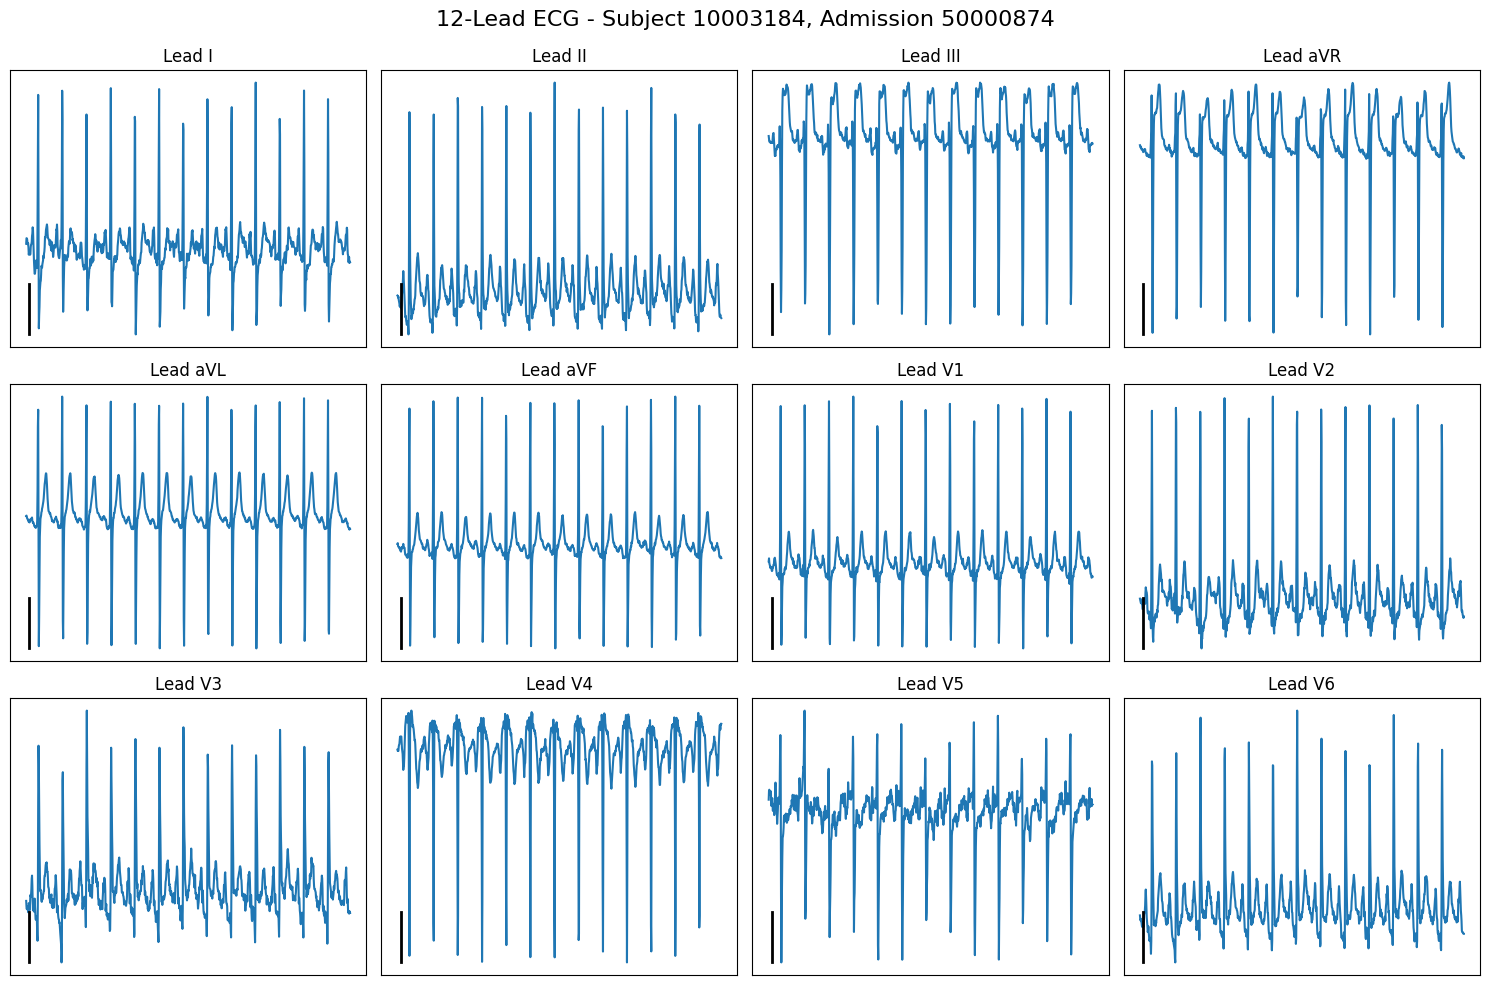

In [33]:
import re
import numpy as np
import pandas as pd
msg = "I want to visualize the ecg data of subject 10003184. admission 50000874"
# Regular expression to match "subject id" followed by 8 digits and "admission id" followed by 8 digits
match = re.search(r"subject\s*(\d{8}).*admission\s*(\d{8})", msg, re.IGNORECASE)
if not match:
    print("❌ Please provide both subject_id and admission_id in the correct format.")

subject_id = int(match.group(1))
admission_id = int(match.group(2))

# Load synthetic vital data to find the patient's row
vital_data_path = "/Users/zfeng/Documents/fyp-github/FIT3199-FYP/patient_data/vitals_data.csv"
vital_data = pd.read_csv(vital_data_path)

# Find the patient's row in vital_data based on subject_id and admission_id
patient_row = vital_data[(vital_data['subject_id'] == subject_id) & 
                            (vital_data['admission_id'] == admission_id)]

if patient_row.empty:
    print("❌ Patient not found in vital_data.csv.")

patient_index = patient_row.index[0]  # Get the patient's index in the dataframe
start_idx = patient_row['start'].values[0]  # Extract start index
length = patient_row['length'].values[0]   # Extract length

# Load ECG data directly from ecg_data.npy (no memmap)
ecg_data_path = "/Users/zfeng/Documents/fyp-github/FIT3199-FYP/patient_data/ecg_data.npy"
ecg_data = np.load(ecg_data_path)
original_shape = (np.int64(100000), np.int64(12))
ecg_data = ecg_data.reshape(original_shape)
# Extract ECG data for this specific patient using the start and length from vital data
patient_data = ecg_data[start_idx:start_idx+length, :]

# Standard 12-lead ECG lead names
lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Create a figure with 12 subplots (3x4 grid)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Plot each lead
for i, ax in enumerate(axes):
    if i < 12:  # We have 12 leads
        ax.plot(patient_data[:, i])
        ax.set_title(f'Lead {lead_names[i]}')
        ax.grid(True, alpha=0.3)

        # Add a small vertical scale bar (1 mV)
        y_range = np.max(patient_data[:, i]) - np.min(patient_data[:, i])
        scale_bar = y_range * 0.2  # 20% of the range as a scale reference
        ax.plot([10, 10], [np.min(patient_data[:, i]), np.min(patient_data[:, i]) + scale_bar],
                'k-', linewidth=2)

        # Remove tick labels to mimic clinical ECG appearance
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')  # Hide unused subplot

# Add a title for the entire plot
plt.suptitle(f'12-Lead ECG - Subject {subject_id}, Admission {admission_id}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show